# 4. Regression and Prediction

Talvez o objetivo mais comum da estatística seja responder a questão: Se a variável X é relacionada com a variável Y, como é essa relação e como podemos usar isso para prever Y dado um valor conhecido de X?
Outra importante conexão é a deteccão de anomalias, onde a regressão diagnostica, a partir de uma análise dos dados, algum comportamente estranho que não segue a correlação entre as variáveis.

## 4.1 Simples Linear Regression

A Regressão Linear modela a relação entre a magnitude entre duas variáveis. Por exemplo, como X cresce, Y também decresce. Ou X cresce, Y decresce. Correlação é outra forma de medir o quão duas variáveis estão correlacionadas. 
- Regressão: quantifica a natureza da relação.
- Correlação: mede a força da associação das duas variáveis.


### 4.1.1 The Regression Equation

A Equação da Regressão Linear estima realmente quando Y vai mudar quando X mudar, de forma linear. Temos, portanto, a Equação da Reta.

$ Y = b_0 + b_{1}X $

Onde:
- $ b_0 $ é o ponto onde a reta intercepta o eixo Y
- $ b_1 $ o angulo que a reta está em relação a eixo X
- $ Y $ é a variável responsta ou variável dependente.
- $ X $ é a feature, variável independente

Exemplo prático:

Analisando os dados de um estudo que procura relacionar os anos que trabalhadores passaram expostos a pó de algodão (Exposure) com suas respectivas capacidades pulmonares (PEFR - "peak expiratory flow rate"), como o PEFR se relaciona com o Exposure?

In [100]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from bokeh.plotting import figure, show, output_file
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv')
data.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


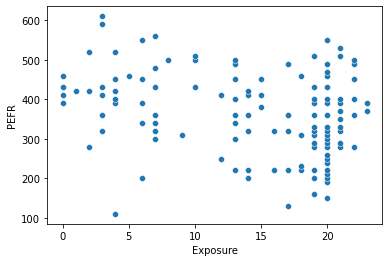

In [13]:
ax = sns.scatterplot(x=data['Exposure'], y=data['PEFR'])

Olhando o gráfico é difícil informar que temos uma relação entre as variáveis. Aplicando um regressão linear para tentar achar a melhor forma de entender o comportamento dos dados, temos que a equação da reta é:

$ PEFR = b_0 + b_{1}Exposure $

Criando um simples modelo de regressão para entender a relação:

In [31]:
#selecionando as variáveis X e Y
X = data[['Exposure']]
y = data['PEFR']

#criando um simples modelo de regressão
lm = LinearRegression()
lm.fit(X,y)
yp = lm.predict(X)

print(f'Coeficiente b_0 = {lm.intercept_:.2f}')
print(f'Coeficiente b_1 = {lm.coef_[0]:.2f}')

Coeficiente b_0 = 424.58
Coeficiente b_1 = -4.18


Ou seja, a equação da reta fica:

$ PEFR = 424.58 - 4.18(Exposure)$

Traçando no gráfico:

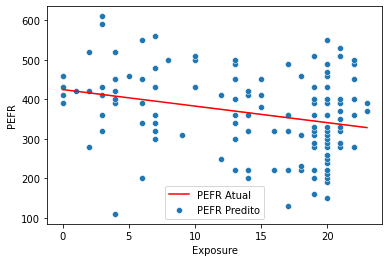

In [53]:
ax = sns.lineplot(x=data['Exposure'], y=yp, color = 'red', label='PEFR Atual')
ax = sns.scatterplot(x=data['Exposure'], y=data['PEFR'], label='PEFR Predito')

Pelo gráfico acima, nós vemos que há um *gap* entre o predito, em vermelho, e os dados reais. Estatisticamente essa diferença é chamada de resíduos ou erro e é usado nos cálculos do RMSE (Raiz quadrada do erro-médio) e MAE (Erro médio absoluto). *Scikit-learn* nos fornece uma biblioteca de métricas para calcular esses valores.

In [95]:
MAE = mean_absolute_error(y,yp)
RMSE = np.sqrt(mean_squared_error(y,yp))

print(f'MAE = {MAE:.2f}')
print(f'RMSE = {RMSE:.2f}')

MAE = 150660.91
RMSE = 261220.20


O método de minimizar a Soma dos Quadrados dos Resíduos (RSS) é conhecido como Regressão Least Squares ou Regressão Ordinary Least Squares (OLS)

Historicamente, o uso primário da regressão é indicar uma suposta linha que relacione a variável resposta com a variável independente, tendo como objetivo entender a relação e usar os dados para explicar isso, conseguindo prever resultados futuros. Porém, se analisarmos algumas situações, podemos ver que a regressão é utilizada também para explicar fenomenos/relações e não apenas para prever. Ou seja, podemos usar esse a Regressão Linear para realiar análises descritivas ou diagnósticas 

**Importante** : A equação do modelo de regressão indica uma correlação entre as variáveis, e não uma situação de causa e efeito.

## 4.2 Multiple Linear Regression

A equação da reta anterior é usada para quando temos apenas uma variável independente, ou seja, uma única feature. Para problemas mais complexos com várias features utilizamos a seguinte equação:

$ Y = b_0 + b_{1}X_{1} + + b_{2}X_{2} +  ... + b_{p}X_{p} + e $

Agora, no lugar de uma simples linha, nós temos um modelo linear - a relação entre cada coeficiente e sua feature é linear.

Exemplo:

Um exemplo do uso de regressão é para estimar o preço de casas, tendo como objetivo saber quais seus respectivos impostos/taxas. Segue abaixo o dataset com essas informações:

In [67]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/house_sales.csv', sep='\t')
dataframe.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


O objetivo nesse caso será prever qual será o preço ajustado, partindo de outras features

In [71]:
dataframe.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [73]:
# Selecionando as features
features = ['AdjSalePrice', 'SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']
dataframe = dataframe[features]
dataframe.head()

,AdjSalePrice,SqFtLot,SqFtTotLiving,Bathrooms,Bedrooms,BldgGrade
1,300805.0,9373,2400,3.00,6,7
2,1076162.0,20156,3764,3.75,4,10
3,761805.0,26036,2060,1.75,4,8
4,442065.0,8618,3200,3.75,5,7
5,297065.0,8620,1720,1.75,4,7


In [75]:
# Verificando a existência de valores nulos
dataframe.isnull().sum()

AdjSalePrice     0
SqFtLot          0
SqFtTotLiving    0
Bathrooms        0
Bedrooms         0
BldgGrade        0
dtype: int64

In [76]:
# Verificando os tipos dos dados
dataframe.dtypes

AdjSalePrice     float64
SqFtLot            int64
SqFtTotLiving      int64
Bathrooms        float64
Bedrooms           int64
BldgGrade          int64
dtype: object

Como verificado, não temos valores nulos no dataset e todas os dados estão com um tipo adequado. Partindo agora para calcular os coeficientes da equação:

In [103]:
# Selecionando as variáveis X e y
y = dataframe['AdjSalePrice']
X = dataframe[['SqFtLot', 'SqFtTotLiving', 'Bathrooms', 'Bedrooms', 'BldgGrade']]

#criando um simples modelo de regressão
lm = LinearRegression()
lm.fit(X,y)
yp = lm.predict(X)

print(f'Coeficiente b_0 (intercepto) = {lm.intercept_:.2f}')

for name, coef in zip(X.columns, lm.coef_):
    print(f'Coeficiente b_1 ({name}) = {coef:.2f}')

Coeficiente b_0 (intercepto) = -521871.37
Coeficiente b_1 (SqFtLot) = -0.06
Coeficiente b_1 (SqFtTotLiving) = 228.83
Coeficiente b_1 (Bathrooms) = -19442.84
Coeficiente b_1 (Bedrooms) = -47769.96
Coeficiente b_1 (BldgGrade) = 106106.96


Ou seja, a equação linear que "descreve" o comportamento do preço é:

$ Y =-521871.37-0.06(SqFtLot)+228.83(SqFtTotLiving)-19442.84(Bathrooms)+-47769.96(Bedrooms)+106106.96(BldgGrade) + e $

Calculando o RMSE e o MAE para entender a qualidade do modelo (é mais útil quando comparamos com outros modelos). Podemos também Calcular o $ R^{2} $, que varia de 0 a 1 e calcula a proporção com que os dados preditos estão coerentes com os valores reais. É bastante útil na regressão para entender quão bem o modelo performou.

In [98]:
MAE = mean_absolute_error(y,yp)
RMSE = np.sqrt(mean_squared_error(y,yp))
R_2 = r2_score(y, yp)

print(f'MAE = {MAE:.2f}')
print(f'RMSE = {RMSE:.2f}')
print(f'R_2 = {R_2:.2f}')

MAE = 150660.91
RMSE = 261220.20
R_2 = 0.54


Resumindo o resultado em uma única tabela:

In [104]:
model = sm.OLS(yp, X.assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.805e+34
Date:                Wed, 31 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:45:42   Log-Likelihood:             4.8223e+05
No. Observations:               22687   AIC:                        -9.645e+05
Df Residuals:                   22681   BIC:                        -9.644e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtLot          -0.0605   3.33e-17  -1.82e+15

#### Cross-Validation

Métricas de regressão clássicas ($R^2$) são todas métricas "na-análise", ou seja, eles apicam os mesmos dados que foram usados para "treinar" o modelo. Intuitivamente, é possível perceber que seria melhor se separássemos uma fatia dos dados para treino e outro para teste, para verificar como o modelo performa. Normalmente, seria usado um grande volume de dados para treinar o modelo e apenas uma pequena amostra para testá-lo. Porém, é evidente de que o treino e o teste irão variar de acordo com quais dados forem selecionados. Então quão diferente seriam esses resultados?
A ideia de **Cross-Validation** é justamente extender a ideia de aplicação de dados separados do treino para teste de forma iterativa, variando os dados tanto de treino, como de teste. O algorítimo de um *k-fold cross-validation* básico segue a seguinte sequência:

- 1) Separa 1/k dos dados como uma amostra;
- 2) Treina o modelo com os dados restantes;
- 3) Aplica o modelo nos dados separados 1/k e registra as métricas do modelo obtido;
- 4) Devolve os primeiros 1/k e separa novamente novo 1/k dos dados como uma amostra.
- 5) Repete os passos 2 e 3
- 6) Reprete até que cada registro tenha sido usado na amostra que é separada inicialmente;
- 7) As métricas do modelo serão as médias das métricas de todos os modelos registrados.
